<h1>A2: Unsupervised Analysis</h1>

<em><strong>Team 6</strong></em>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Knowing how to target consumers can be challenging. To allocate budget and resources as efficiently as possible it is important to analyze their features.<br><br>
The mobile app research survey enabled us to gain insights by analyzing the consumers behavior, personality traits and demographics.<br><br>
We were able to identify six consumer clusters with distinct features that can be targeted by the marketing department.<br><br>
The main differentiating characteristics can be summarized by whether they follow trends or not, whether they have a lot of apps on their phone and whether they are early adopters or followers when it comes to technological developments.

In [1]:
# required packages
import numpy                 as np                      # mathematical essentials
import pandas                as pd                      # data science essentials
import matplotlib.pyplot     as plt                     # fundamental data visualization
import seaborn               as sns                     # enhanced visualization
from sklearn.preprocessing   import StandardScaler      # standard scaler
from sklearn.decomposition   import PCA                 # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering

# data loading from Excel
survey_df = pd.read_excel('Mobile_App_Survey_Data.xlsx')

# display options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Exploration of survey data</strong>

From the data collected with the Mobile App Research Survey we identified that we didn't have any missing values and that all the data is of the same type, meaning that a pre-screening of the survey responses had been done.<br><br>
We also identified that the questions of the survey were divided into different categories and used different response ranges. The questions were related to demographics, purchase and general behavior, and personality.<br><br>
This meant that we would require to scale our responses and create different groups of questions.<br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Dropping the demographic features of the dataset</strong>

For our initial analysis we only used the behavior and personality questions because these are extremely different from the demographic ones.

In [3]:
# creating a list with demographic features
drop_lst = ['caseID', 'q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8', 'q2r9', 'q2r10', 'q4r1',
            'q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6', 'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11',
            'q48', 'q49', 'q50r1', 'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']

# dropping demographic information
customers_agree = survey_df.drop(drop_lst,
                                 axis = 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Controlling for different ranges and answering types</strong>

We scaled our data to control for the use of different ranges in the responses.
<br><br>
Also, we identified that we needed to normalize our data to treat people that are answering more extremely than others in the same manner as the rest of the population. So, we decided to first scale our data based on each respondent and then for each question.<br>

In [4]:
# creating a copy of column lables before rotating data
customers_agree_columns = customers_agree.columns

In [5]:
# rotating data frame and scaling
respondent_wise = np.array(customers_agree)                          # creates an array that can be rotated
respondent_wise_T = respondent_wise.T                                # rotates the array
respondent_wise_df = pd.DataFrame(respondent_wise_T)                 # makes the array a data frame again
respondent_wise_scaled = unsupervised_scaler(respondent_wise_df)     # scales the "rows" that were rotated into columns

# rotating data frame back and scaling
respondent_wise_scaled_array = np.array(respondent_wise_scaled)      # creates an array that can be rotated
respondent_wise_scaled_array_T = respondent_wise_scaled_array.T      # rotates the array
customers_agree = pd.DataFrame(respondent_wise_scaled_array_T)       # makes the array a data frame again
customers_agree.columns = customers_agree_columns                    # adds original labels to the data frame

customers_agree_scaled = unsupervised_scaler(df = customers_agree)   # scales the original columns

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Creating data sets for non-demographic questions</strong>

Then we created two new sets of data that only contained the purchase and general behavior questions, and the personality questions, respectively. 

In [6]:
# creating a list to drop personality questions
drop_lst_bhv = ['q24r1', 'q24r2', 'q24r3', 'q24r4','q24r5', 'q24r6', 'q24r7', 'q24r8', 'q24r9', 'q24r10', 'q24r11',
                'q24r12', 'q25r1', 'q25r2', 'q25r3','q25r4', 'q25r5', 'q25r6', 'q25r7', 'q25r8', 'q25r9', 'q25r10',
                'q25r11', 'q25r12']

# creating a list to drop behavior questions
drop_lst_per = ['q11', 'q12', 'q13r1','q13r2', 'q13r3', 'q13r4', 'q13r5', 'q13r6', 'q13r7', 'q13r8', 'q13r9', 'q13r10', 'q13r11', 'q13r12', 'q26r18',
                'q26r3', 'q26r4', 'q26r5', 'q26r6', 'q26r7', 'q26r8', 'q26r9', 'q26r10', 'q26r11', 'q26r12', 'q26r13',
                'q26r14','q26r15', 'q26r16', 'q26r17']

# dropping the defined lists
customers_bhv = customers_agree_scaled.drop(drop_lst_bhv,
                                            axis = 1)

customers_per = customers_agree_scaled.drop(drop_lst_per,
                                            axis = 1)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Principal Component Analysis PCA</strong>

We began with the principal component algorithm. The main goals for using this algorithm for our analysis are:
<br>
1. Reducing the number of explanatory variables of our data needed to explain a high degree of variance among customers.
<br>
2. Understanding abstract ideas or underlying factors from customers that are not easily measured through the survey.
<br>
3. Using explanatory variables that are correlated among them.<br>

<strong>Purchase and general behavior PCA</strong>

We began by running the principal component analysis only for the purchase and general behavior questions.

In [7]:
# INSTANTIATING PCA object / no limit on principal components
pca_bhv = PCA(n_components = None,
            random_state = 219)

# FITTING and TRANSFORMING scaled data
customer_pca_bhv = pca_bhv.fit_transform(customers_bhv)

<strong>Evaluation of PCA algorithms</strong>

To understand how much of the variance is explained by each of our components of the purchase and general behavior data set we used a scree plot. This plot helped us identify that by taking the first three components we could already explain a good amount of the variance in the behavior among the customers.

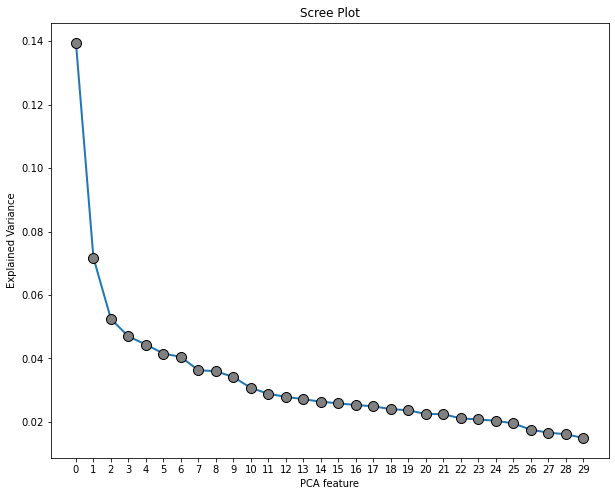

In [8]:
# scree_plot function with all components
scree_plot(pca_bhv, export = False)

In [9]:
# INSTANTIATING a new model using the first three principal components
pca_3_bhv = PCA(n_components = 3,
                random_state = 219)

# FITTING and TRANSFORMING the customers_bvh
customer_pca_3_bhv = pca_3_bhv.fit_transform(customers_bhv)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Personality PCA</strong>

After identifying the principal components for the purchase and general behavior questions, we followed the same analysis for the personality questions.

In [10]:
# INSTANTIATING PCA object / no limit on principal components
pca_per = PCA(n_components = None,
              random_state = 219)

# FITTING and TRANSFORMING scaled data
customer_pca_per = pca_per.fit_transform(customers_per)

<strong>Evaluation of PCA algorithms</strong>

By creating a new scree plot for the personality questions, we were able to identify that for this set of data, taking the first three components would also be our best option to explain a good amount of the variance in the personality of the customers.

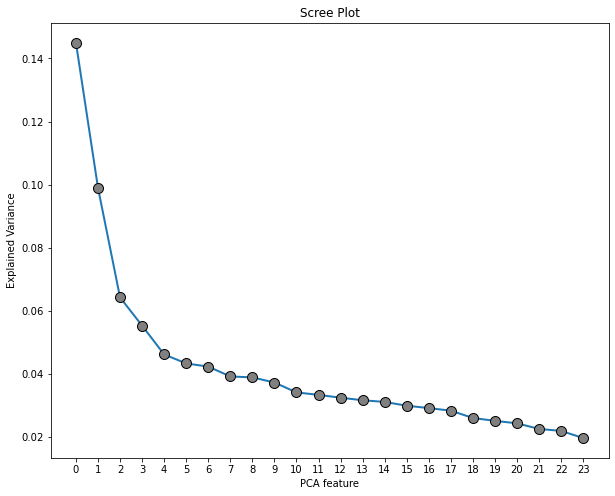

In [11]:
# scree_plot function with all components
scree_plot(pca_per, export = False)

In [12]:
# INSTANTIATING a new model using the first three principal components
pca_3_per = PCA(n_components = 3,
                random_state = 219)

# FITTING and TRANSFORMING the customers_per
customer_pca_3_per = pca_3_per.fit_transform(customers_per)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Interpreting Principal Components and Persona Development</strong>

To develop our persona from our customers we decided to interpret the meaning of each principal component by looking at their factor loadings. In other words, we identified how much each component relates with each question. This helped us name each potential persona according to the positive and negative affinity with each feature or in this case each behavior question of the app survey.
<br>
<br>
After developing a persona for each principal component, we renamed the columns of our data with the agreed persona names.

In [13]:
# transposing pca components
factor_loadings_df_bhv = pd.DataFrame(np.transpose(pca_3_bhv.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_df_bhv = factor_loadings_df_bhv.set_index(customers_bhv.columns)

# # saving to Excel
# factor_loadings_df_bhv.to_excel('customer_factor_loadings_bhv.xlsx')

<strong>Persona Development - Behavior questions</strong>

From the previous analysis, we identified that we could have three types of customers based on their purchase and general behavior:<br>
1. Proactive: customers who don't enjoy spending time on mature platforms.<br>
2. Not Trendy: customers who don't like luxury and designer brands nor apps.<br>
3. App Lovers: customers who like to show off, and love having a lot of apps.<br>

In [14]:
# naming each principal component with persona names
factor_loadings_df_bhv.columns = ['Proactive',    # don't enjoy spending time on mature platforms 
                                  'Not Trendy',    # don't like luxury and designer brands nor apps
                                  'App Lovers']    # show off, App lovers with a lot of apps

In [15]:
# transposing pca components
factor_loadings_df_per = pd.DataFrame(np.transpose(pca_3_per.components_.round(decimals = 2)))

# naming rows as original features
factor_loadings_df_per = factor_loadings_df_per.set_index(customers_per.columns)

# # saving to Excel
# factor_loadings_df_per.to_excel('customer_factor_loadings_per.xlsx')

<strong>Persona Development - Personality questions</strong>

The same way, we identified that we could have three types of customers based on their personality:<br>
1. Opinionated: customers who don't like to be with a lot of people and prefer to make and show their own opinions.<br>
2. Indoorsy: customers who prefer to be indoors, they are introverts and not risk takers.<br>
3. Antiquated: customers who don't like technology, and have all the time in the world.<br>

In [16]:
# naming each principal component with persona names
factor_loadings_df_per.columns = ['Opinionated',   # don't like people, have their own opinions 
                                  'Indoorsy',      # indoor person, introverted, not risk takers 
                                  'Antiquated']    # don't like technology, have all the time in the world

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Customer-Level Personas</strong>

After developing our personas, we began to analyze how much each respondent fitted into each group we created.
<br>

<strong>Customer-Level Personas - Behavior</strong>

Analyzing the first three customers, it is clear that the first of them shows a behavior of being into trends and apps because of the "Not Trendy" component, which is confirmed by the "App Lovers" component that supports that this customer likes to show off and have a lot of apps.<br>
The second customer exhibits a more reserved behavior based on its "Not Trendy" component where he/she doesn't like the latest trends. Also, this customer has a negative affinity towards the "Proactive" component, which could mean they prefer to enjoy spending time in more mature platforms.<br>
The third customer, based on their components we could identify a customer who likes to show off and have a lot of trendy apps more than mature ones.

In [17]:
# analyzing factor strengths per customer for behavior
factor_loadings_3_bhv = pca_3_bhv.transform(customers_bhv)

# converting into DataFrame
factor_loadings_df_3_bhv = pd.DataFrame(factor_loadings_3_bhv)

# renaming columns
factor_loadings_df_3_bhv.columns = factor_loadings_df_bhv.columns

# checking first three rows
factor_loadings_df_3_bhv.head(n = 3)

,Proactive,Not Trendy,App Lovers
0,0.616615,-1.909319,1.264654
1,-0.705053,1.235754,0.415692
2,2.700371,-2.205394,1.181775


<strong>Customer-Level Personas - Personality</strong>

Analyzing the first three customers, we can determine that the first of them shows a personality of having a strong opinion and not enjoying spending time with other people because of the "Opinionated" component, which is confirmed by the "Indoorsy" component that supports that this customer is not introvert and usually will let others know their opinion even if this represents a risk of conflict.<br>
The second customer exhibits a similar personality regarding its strong opinions based on its "Opinionated". Also, this customer has a strong affinity towards the "Antiquated" component, which could mean they don't like technology, and have all the time in the world to develop their opinions.<br>
The third customer, based on their components we could identify a customer who likes to share their own opinions and tends to have free time for the developing of their own opinions.

In [18]:
# analyzing factor strengths per customer for personality
factor_loadings_3_per = pca_3_per.transform(customers_per)

# converting into DataFrame
factor_loadings_df_3_per = pd.DataFrame(factor_loadings_3_per)

# renaming columns
factor_loadings_df_3_per.columns = factor_loadings_df_per.columns

# checking first three rows
factor_loadings_df_3_per.head(n = 3)

,Opinionated,Indoorsy,Antiquated
0,1.691178,-1.999597,-0.923224
1,2.477402,-0.507806,2.245176
2,1.718561,-0.559672,0.757342


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<strong>Clusters development</strong>

To begin the development of clusters we merged our previous principal components into one single data set. In this way our clusters would be established based on all the personas we had identified.<br><br>
It is important to mention that to form our clusters we need to rescale our data again because we need that the variance amongst the explanatory variables to be equal. This way our clusters won't be biased by the different variances of these variables.

In [19]:
# concatenating behavior and personality factor loadings into single DataFrame
customer_pca_3_combined = pd.concat([factor_loadings_df_3_bhv,
                                     factor_loadings_df_3_per],
                                     axis = 1)

In [20]:
# applying the unsupervised_scaler function
pca_scaled = unsupervised_scaler(customer_pca_3_combined)

<strong>Agglomerative Clustering</strong>

From the dendrogram it can be seen that having three clusters could be a good starting point. The orange cluster managed to group together more customers in an initial phase, while the green and red clusters needed to move further along the similarities of customers to be able to group them together as similar.

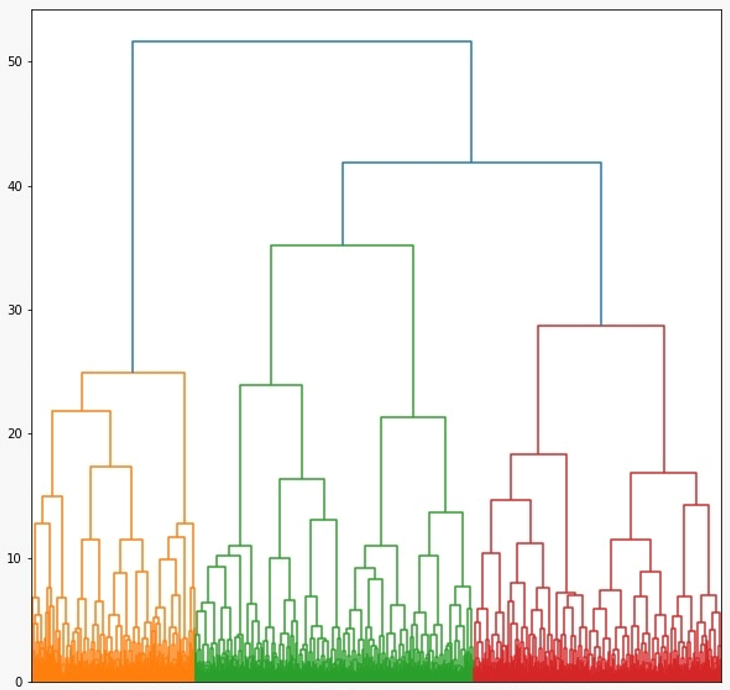

In [21]:
# # grouping data based on Ward distance
# standard_mergings_ward = linkage(y = pca_scaled,
#                                   method = 'ward',
#                                   optimal_ordering = True)

# # setting plot size
# fig, ax = plt.subplots(figsize=(10, 10))

# # developing a dendrogram
# dendrogram(Z = standard_mergings_ward,
#             leaf_rotation = 90,
#             leaf_font_size = 6)

# plt.savefig('dendogram.png')

# # rendering the plot
# plt.show()

<br>Continuing with the cluster analysis we decided to compare the size of each cluster by trying different number of clusters and comparing the mean values for each cluster. By looking at the mean values of the candidate number clusters, we decided that the best cluster size for us was 6.<br>

In [22]:
# INSTANTIATING a k-Means object with 6 clusters
customers_k_pca = KMeans(n_clusters   = 6,
                         random_state = 219)

# fitting the object to scaled data
customers_k_pca.fit(pca_scaled)

# converting the clusters to DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})

In [23]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# renaming principal components
centroids_pca_df.columns = ['Proactive',
                            'Not Trendy',
                            'App Lovers',
                            'Opinionated',
                            'Indoorsy',
                            'Antiquated']

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Proactive,Not Trendy,App Lovers,Opinionated,Indoorsy,Antiquated
0,0.50,-0.86,-0.62,-0.68,0.17,0.46
1,-1.31,0.06,0.19,-0.03,0.58,0.14
2,0.30,-0.57,1.21,0.14,0.48,0.87
3,0.07,-0.28,-0.43,0.30,-1.37,0.41
4,-0.29,0.34,-0.40,-0.79,-0.25,-1.06
5,0.70,1.48,0.14,1.46,0.30,-0.71


In [24]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         customer_pca_3_combined],
                         axis = 1)

# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df.loc[ : , ['q1', 'q2r1', 'q2r2', 'q2r3', 'q2r4', 'q2r5', 'q2r6', 'q2r7', 'q2r8',
                                                    'q2r9', 'q2r10', 'q4r1','q4r2', 'q4r3', 'q4r4', 'q4r5', 'q4r6',
                                                    'q4r7', 'q4r8', 'q4r9', 'q4r10', 'q4r11','q48', 'q49', 'q50r1',
                                                    'q50r2', 'q50r3', 'q50r4', 'q50r5', 'q54', 'q55', 'q56', 'q57']],
                                  clst_pca_df.round(decimals = 2)],
                                  axis = 1)

# renaming columns
final_pca_clust_df.columns = ['Age Group',
                              'iPhone', 'iPod', 'Android', 'BlackBerry', 'Nokia', 'Windows Phone', 'HP', 'Tablet', 'Other_Smartphone', 'None_Smart',
                              'Music', 'TV Check', 'Entertainment', 'TV Show', 'Gaming', 'Social Network', 'GenNews', 'Shopping', 'SpecNews', 'Other_News', 'None_News',
                              'Education Level',
                              'Marital Status',
                              'No children', 'Children < 6', 'Children 6-12', 'Children 13-17', 'Children > 18',
                              'Race',
                              'Hispanic or Latino',
                              'Income',
                              'Gender',
                              'Cluster',
                              'Proactive',
                              'Not Trendy',
                              'App Lovers',
                              'Opinionated',
                              'Indoorsy',
                              'Antiquated']

In [25]:
# renaming Age groups
age_groups = {1  : 'Under 18',
              2  : '18-24',
              3  : '25-29',
              4  : '30-34',
              5  : '35-39',
              6  : '40-44',
              7  : '45-49',
              8  : '50-54',
              9  : '55-59',
              10 : '60-64',
              11 : '65 and over'}

final_pca_clust_df['Age Group'].replace(age_groups, inplace = True)

# renaming regions
cluster_names = {0 : 'Offline_trend_followers',
                 1 : 'Prolonged_users',
                 2 : 'Simple_app_lovers',
                 3 : 'Outdoor_opinion_leaders',
                 4 : 'Tech_socializer',
                 5 : 'Performance_focused'
                 }

final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

# adding a productivity step
data_df = final_pca_clust_df

Then we refined these descriptions by incorporating our demographic questions and analyzing and testing the assumptions we had for the different customer groups, and we obtained the final descriptions:<br>
1. **Offline_trend_followers**: Customers who on average have a higher income and enjoy spending money for luxury products. These preferences translate into downloading apps that have a higher quality with in-app purchases. <br>
     - The marketing department should target these consumers with exclusive offers that offer additional features for money. Offline and influencer marketing are good channels for the advertisements.<br><br>
  
2. **Prolonged_users**: These consumers enjoy simple and established apps. Accordingly, they are loyal customers who are satisfied with past technological developments.<br>
    - The marketing department should target these consumers by reassuring them that new versions of apps will not fundamentally change the app features. Good channels for the marketing are well established apps.<br><br>
    
3. **Simple_app_lovers**: Users that don't need to be convinced to download the simple next app. However, they tend to also move on fast. They spend most of their time on social networks and gaming apps and on average the least time on entertainment apps. Overall, they tend to have more time to spend on apps as only 40% of them have children.<br>
    - The marketing department should target these consumers by emphasizing the simplicity of the app, social and gamification aspects can also be good hooks for advertisements.<br><br>
        
4. **Outdoor_opinion_leaders**: Early adopters that prefer apps that provide insights for outdoor activities. They are also opinion leaders who can make or break the success of an app. Their most used apps are social networks and gaming apps.<br>
    - The marketing department should target these consumers early during the development of the app. Features that enable the consumer to explore their outdoorsy and risk-taking nature should be emphasized, as well as options on how to use the app while engaging in real world experiences.<br><br>
    
5. **Tech_socializer**: Users that enjoy using apps for entertainment, shopping, and socializing. They are also a good target group for in app purchases because of their higher income.<br>
    - The marketing department should target these consumers on apps that fully engage the consumer such as entertainment, shopping, or social network apps. Because of their higher income they can also be targeted for in app purchases.<br><br>
        
6. **Performance_focused**: On average young and female customers, with a lower income. Their interest on social networking apps is less important on average as they spend most of their time on TV show apps and generally apps that have a high content value. They tend to focus on performance over interface appearance.<br>
    - The marketing department should target these consumers through apps that emphasize the performance of the app more than the look and feel of the app. These young consumers are looking for the true benefit of an app. A good channel are TV show apps.